<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [4]:
class SGDRegressor(BaseEstimator):
    
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta #gradient parameter
        self.n_epochs = n_epochs #pass count
        self.mse_ = [] #mean squared errors
        self.weights_ = [] #weight vector for GD iterations
     
    #class methods   
    def fit(self, X, y):
        #1 append column of 1s to  X on the left side
        temp = [np.ones([X.shape[0], 1]), X]
        X = np.hstack(temp)
        
        #2 initialize weight vector w with zeros 
        w = np.zeros(X.shape[1])
        
        #3 make n_epochs iterations of weight updates
        for it in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):                
                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]  
                w = new_w.copy()
                
                #4 log MSE, w
                self.mse_.append(mean_squared_error(y, X.dot(w)))
                self.weights_.append(w)
        
        #5 create w_ variable to store weights which produce minimal MSE
        self.w_ = self.weights_[np.argmin(self.mse_)]
        
        return self
                  
    def predict(self, X):
        #take X matrix, add column of ones to the left side
        temp = [np.ones([X.shape[0], 1]), X]
        X = np.hstack(temp) 
        
        return X.dot(self.w_) #prediction vector               

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [5]:
data_demo = pd.read_csv('data/weights_heights.csv')

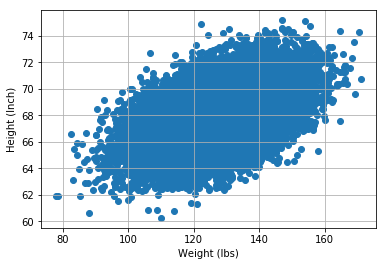

In [6]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [7]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [18]:
X_train.reshape([-1, 1]).shape

(17500, 1)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_train.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [20]:
X_train_scaled

array([[-0.60294577],
       [-1.38028811],
       [ 0.37833715],
       ...,
       [-0.59374395],
       [ 1.27525138],
       [-0.09353415]])

In [21]:
SGD = SGDRegressor()
SGD.fit(X_train_scaled, y_train)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.04s/it]


SGDRegressor(eta=0.001, n_epochs=3)

In [22]:
SGD.mse_

[4616.852920655767,
 4608.3375526145255,
 4598.768933110513,
 4589.623842635082,
 4580.301228187296,
 4571.640079739265,
 4561.801172200144,
 4552.423952074522,
 4543.291313548409,
 4534.247381237229,
 4525.1795855814435,
 4515.579015460564,
 4507.060077824063,
 4497.6642671194095,
 4488.353520687662,
 4479.488541445518,
 4470.5238585418865,
 4461.940693269497,
 4453.16460417838,
 4444.200036030372,
 4435.243317789221,
 4425.8916005069495,
 4417.590983549627,
 4408.799940125173,
 4400.4683298597165,
 4391.86901973491,
 4383.111026116577,
 4373.837959907845,
 4364.345145438097,
 4356.270791417086,
 4347.72366968802,
 4338.747640892751,
 4330.455975088126,
 4321.550555258036,
 4313.963031535591,
 4304.915989451533,
 4296.302723684518,
 4288.01319014944,
 4279.40939258681,
 4270.287806297105,
 4261.454002522366,
 4252.848466987705,
 4244.478261013102,
 4236.611098954353,
 4228.662970039417,
 4220.089950204456,
 4211.236737854749,
 4203.361033694716,
 4195.443799854765,
 4186.94416435414,


Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

Text(0, 0.5, 'MSE')

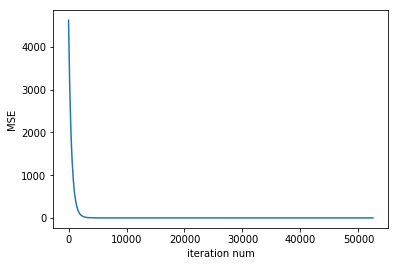

In [65]:
plt.plot(SGD.mse_)
plt.xlabel('iteration num')
plt.ylabel('MSE')

Print the minimal value of mean squared error and the best weights vector.

In [23]:
print(f'min MSE is {np.min(SGD.mse_)}')
print(f'the best weights vector is {SGD.w_}')

min MSE is 2.7151352406643627
the best weights vector is [67.9898497   0.94447605]


Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

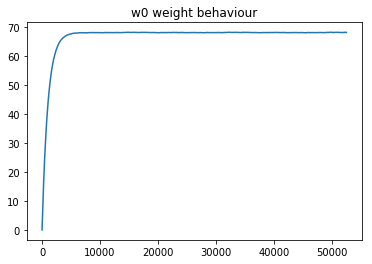

In [86]:
plt.plot([w[0] for w in SGD.weights_])
plt.title('w0 weight behaviour')
plt.show()

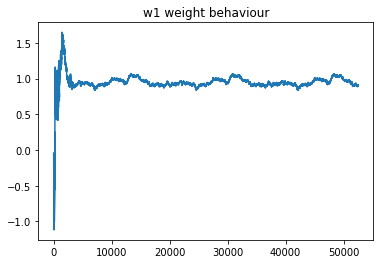

In [87]:
plt.plot([w[1] for w in SGD.weights_], drawstyle='steps')
plt.title('w1 weight behaviour')
plt.show()

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [24]:
sgd_test_mse = mean_squared_error(y_valid, SGD.predict(X_valid_scaled))
sgd_test_mse

2.6708681207033784

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [97]:
from sklearn.linear_model import LinearRegression

In [99]:
lm = LinearRegression().fit(X_train_scaled, y_train)
print(lm.coef_, lm.intercept_)
linreg_test_mse = mean_squared_error(y_valid,lm.predict(X_valid_scaled))
linreg_test_mse

[0.94537278] 67.98930834742858


2.670830767667635

In [104]:
try:
    assert (sgd_test_mse - linreg_test_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
